In [ ]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from rankingFairness.src.experimentMultipleGroups import MARKERS, COLORMAP
from rankingFairness.src.tradeoffMultipleGroups import computeiDCG
from rankingFairness.src.plot.main_figs import plot_census, plot_census_rev1


import numpy as np
import pickle
import os.path as osp
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats
from sklearn.calibration import CalibratedClassifierCV

In [3]:
COLORMAP

{'PRP': 'tab:blue',
 'TS': 'tab:orange',
 'DP': 'tab:grey',
 'Uniform': 'tab:green',
 'EOR': 'tab:red',
 'PRR': 'tab:olive',
 'RA': 'tab:cyan',
 'EXP': 'tab:purple',
 'DPE': 'tab:pink'}

In [4]:
state="NY"
income_threshold=50000
group_name='RAC1P'
sim=10
num_groups=4
labels_use=False
plot_median=True

In [5]:
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/cost_groups_labels_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    cost_groups = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/total_cost_labels_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    total_cost = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/eo_constraint_labels_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    EO_constraint = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/delta_max_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    delta_max = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/total_cost_std_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    total_cost_std = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/group_cost_std_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    group_cost_std = pickle.load(fp)
with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/dcgUtil_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
    dcgUtil = pickle.load(fp)
if labels_use:
    with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/merits_{labels_use}_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
        merits = pickle.load(fp)
else:
    with open(f'/share/thorsten/rr568/CostOptimal_FairRankings/ACSIncome/'+f'{state}'+f'/probs_True_sim_{sim}_{num_groups}_groups_median_{plot_median}', 'rb') as fp:
        probs = pickle.load(fp)

In [6]:
if labels_use:
    rel=merits.squeeze(0)
else:
    rel=probs

In [7]:
from rankingFairness.src.rankingsMultipleGroups import PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker, epiRAnker


In [8]:

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
offset=0.09

In [9]:
group_names=['White', 'African-American', 'Asian', 'Other']

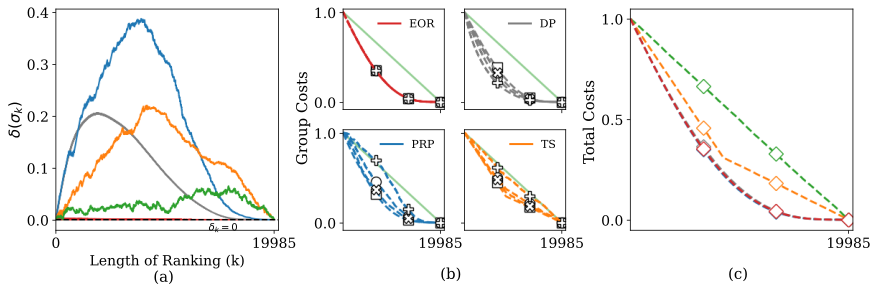

In [10]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"census_main_{state}_sim_{sim}_num_groups_{num_groups}_labels_use_{labels_use}_plot_median_{plot_median}.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4}
CensusmMarker_dict={'White': MARKERS[0],
                  'Black': MARKERS[1],
                  'Asian': MARKERS[2],
                  'Others': MARKERS[3],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
# fig_kw['offset']=0.06
fig_kw['offset']=0.02
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.1
fig_kw['hspace']=None
fig_kw['wspace']=None
fig_kw['rasterized']=True



fig_kw['figsize']=(12,4)
dcg=None
dcg_option=False

plot_census(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, CensusmMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)

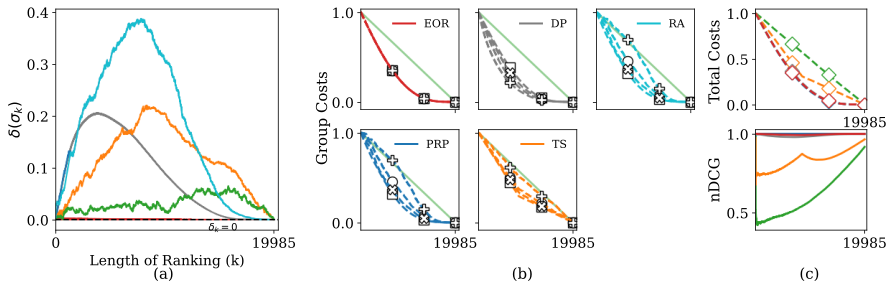

In [11]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"dcg_census_main_{state}_sim_{sim}_num_groups_{num_groups}_labels_use_{labels_use}_plot_median_{plot_median}.pdf"
# legendFileName=f'census_appendix_legend.pdf'
# legendFileName=f'census_appendix_legend_2_groups.pdf'
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, epiRAnker]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                    'RA':5}
CensusmMarker_dict={'White': MARKERS[0],
                  'Black': MARKERS[1],
                  'Asian': MARKERS[2],
                  'Others': MARKERS[3],
                  'Principal': MARKERS[4],}
# CensusmMarker_dict={'White': MARKERS[0],
#                   'Black': MARKERS[1],
# }


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.02
# fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.1
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True


iDcg = computeiDCG(np.array(rel)) 
num_docs=rel.shape[0]
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcgUtil[i,:],iDcg)

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(12,4)
# dcg=None
# dcg_option=False



plot_census(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, CensusmMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)
#             , legendFileName=legendFileName)